# Pymaceuticals Inc.
---

### Analysis

- In this exercise, we were first given two data sets of mice and their results depending on the time and the drug regimen that these mice go through and how their tumor volume changes.  At first glance through the summary data frame, we are able to see which drug was the most succesful in curing the tumor, as well as how spread out each drug's effectivness were.  
- We also through charts saw how many of each drug regimen were studied, the percentage of each gender of mice, the box plots and outliers of 4 different drug regimens, one specific mouse's reaction towards a drug per time point, and the regression of how weight and tumor volume and if they corrolate to eachother or not. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_data = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
# Checking the number of mice.
mice_count = mouse_study_data['Mouse ID'].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study_data[mouse_study_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_data = mouse_study_data.drop_duplicates(['Mouse ID', 'Timepoint'])

mouse_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_study_data['Mouse ID'].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_data = mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

mean_tumor_volume = summary_data.mean()
median_tumor_volume = summary_data.median()
var_tumor_volume = summary_data.var()
std_tumor_volume = summary_data.std()
sem_tumor_volume = summary_data.sem()

summary_data = pd.DataFrame({'Mean Tumor Volume':mean_tumor_volume, 'Median Tumor Volume':median_tumor_volume, 'Tumor Volume Variance':var_tumor_volume, 'Tumor Volume Std. Dev.': std_tumor_volume,'Tumor Volume Std. Err.': sem_tumor_volume})
summary_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_data_1 = mouse_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_data_1

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

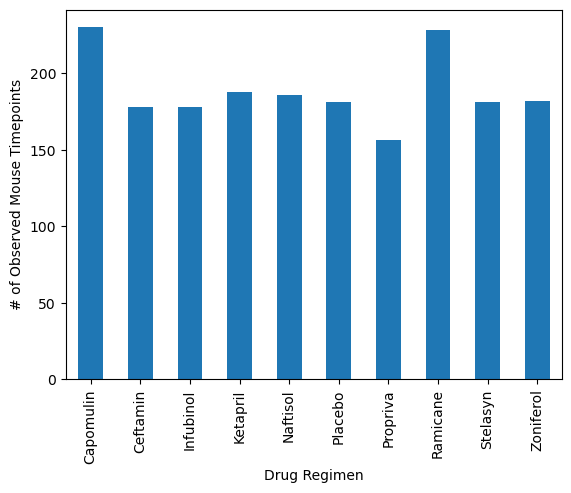

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_id_per_drug = mouse_study_data.groupby('Drug Regimen').count()['Mouse ID']

x_axis = np.arange(len(summary_data))

mouse_id_per_drug.plot(kind='bar')
plt.xticks(x_axis, mouse_id_per_drug.index, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

Text(0, 0.5, '# of Observed Mouse Timepoints')

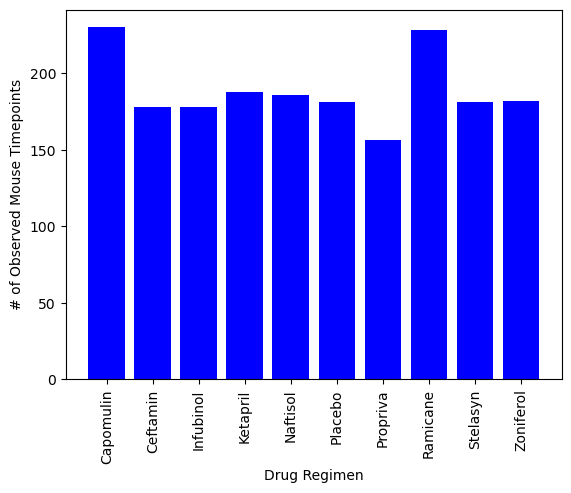

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(x_axis, mouse_id_per_drug, color='blue', alpha=1, align='center')
plt.xticks(x_axis, mouse_id_per_drug.index, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

<Axes: ylabel='Mouse ID'>

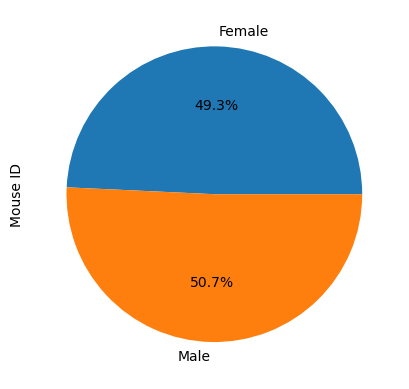

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = mouse_study_data.groupby('Sex').count()['Mouse ID']

gender.plot(kind='pie', y='Sex', autopct='%1.1f%%' )


([<matplotlib.patches.Wedge at 0x210c9e64a50>,
 [Text(0.02562299800632446, 1.099701533132135, 'female'),
  Text(-0.025623100967812958, -1.099701530733132, 'male')],
 [Text(0.01397618073072243, 0.5998371998902553, '49.3%'),
  Text(-0.01397623689153434, -0.5998371985817083, '50.7%')])

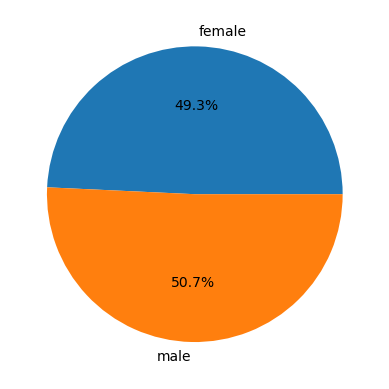

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = mouse_study_data.groupby('Sex').count()['Mouse ID']
labels = ['female', 'male']

plt.pie(gender, labels=labels, autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxtime = mouse_study_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
maxtimedata = pd.merge(mouse_study_data, maxtime, on=['Mouse ID','Timepoint'], how='inner')

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

filtered_maxtimedata = maxtimedata[maxtimedata['Drug Regimen'].isin(drugs)]
filtered_maxtimedata

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
29,c326,5,36.321346,0,Infubinol,Female,18,25
30,c139,45,72.226731,2,Infubinol,Male,11,28
31,v339,5,46.250112,0,Infubinol,Male,20,26
32,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
244,t565,45,34.455298,0,Capomulin,Female,20,17
245,i557,45,47.685963,1,Capomulin,Female,1,24
246,m957,45,33.329098,1,Capomulin,Female,3,19
247,f966,20,30.485985,0,Capomulin,Male,16,17


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol',  'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
capotumorvol = []
ramitumorvol = []
infutumorvol = []
cefttumorvol = []

for drug in regimen:
    drug_data = filtered_maxtimedata[filtered_maxtimedata['Drug Regimen'] == drug]
    tumor_vol = drug_data['Tumor Volume (mm3)']
    
    if drug == 'Capomulin':
        capotumorvol.append(tumor_vol)
    elif drug == 'Ramicane':
        ramitumorvol.append(tumor_vol)
    elif drug == 'Infubinol':
        infutumorvol.append(tumor_vol)
    elif drug == 'Ceftamin':
        cefttumorvol.append(tumor_vol)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capotumorvol = [val for sublist in capotumorvol for val in sublist]
caposeries = pd.Series(capotumorvol, dtype = float)
capoquarts = caposeries.quantile([0.25, 0.5, 0.75])
capoiqr = capoquarts[0.75] - capoquarts[0.25]
capolower = capoquarts[0.25] - (1.5 * capoiqr)
capoupper = capoquarts[0.75] + (1.5 * capoiqr)
capooutliers = caposeries.loc[(caposeries < capolower) | (caposeries > capoupper)]
print(capooutliers)


ramitumorvol = [val for sublist in ramitumorvol for val in sublist]
ramiseries = pd.Series(ramitumorvol, dtype = float)
ramiquarts = ramiseries.quantile([0.25, 0.5, 0.75])
ramiiqr = ramiquarts[0.75] - ramiquarts[0.25]
ramilower = ramiquarts[0.25] - (1.5 * ramiiqr)
ramiupper = ramiquarts[0.75] + (1.5 * ramiiqr)
ramioutliers = ramiseries.loc[(ramiseries < ramilower) | (ramiseries > ramiupper)]
print(ramioutliers)

infutumorvol = [val for sublist in infutumorvol for val in sublist]
infuseries = pd.Series(infutumorvol, dtype = float)
infuquarts = infuseries.quantile([0.25, 0.5, 0.75])
infuiqr = infuquarts[0.75] - infuquarts[0.25]
infulower = infuquarts[0.25] - (1.5 * infuiqr)
infuupper = infuquarts[0.75] + (1.5 * infuiqr)
infuoutliers = infuseries.loc[(infuseries < infulower) | (infuseries > infuupper)]
print(infuoutliers)

cefttumorvol = [val for sublist in cefttumorvol for val in sublist]
ceftseries = pd.Series(cefttumorvol, dtype = float)
ceftquarts = ceftseries.quantile([0.25, 0.5, 0.75])
ceftiqr = ceftquarts[0.75] - ceftquarts[0.25]
ceftlower = ceftquarts[0.25] - (1.5 * ceftiqr)
ceftupper = ceftquarts[0.75] + (1.5 * ceftiqr)
ceftoutliers = ceftseries.loc[(ceftseries < ceftlower) | (ceftseries > ceftupper)]
print(ceftoutliers)

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds



Series([], dtype: float64)
Series([], dtype: float64)
0    36.321346
dtype: float64
Series([], dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

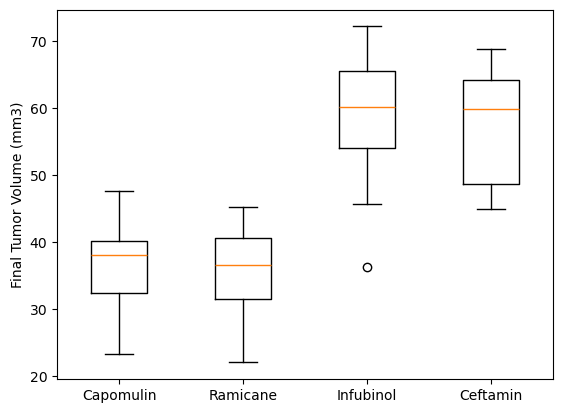

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
drugseries = [caposeries, ramiseries, infuseries, ceftseries]

plt.boxplot(drugseries, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

In [16]:
mouseb128 = mouse_study_data[(mouse_study_data['Mouse ID'] == 'b128')]
mouseb128 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


Text(0.5, 1.0, 'Mouse B128')

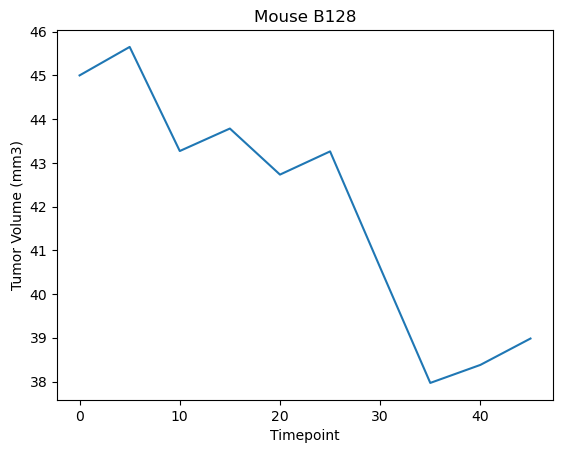

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(mouseb128['Timepoint'], mouseb128['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse B128')

In [18]:
capomulin = mouse_study_data[(mouse_study_data['Drug Regimen'] == 'Capomulin')]
capomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


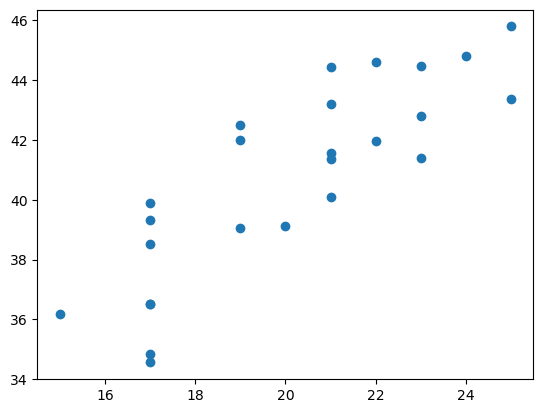

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capovolpermouse = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
capoweight = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(capoweight, capovolpermouse)

## Correlation and Regression

 the correlation between mouse weight and the average tumor volume is 0.84


Text(0, 0.5, 'Tumor Volume (mm3)')

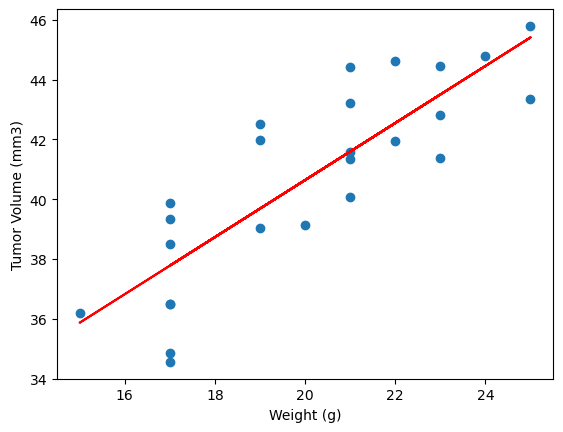

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = round(st.pearsonr(capoweight, capovolpermouse)[0],2)
print(f' the correlation between mouse weight and the average tumor volume is {corr}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capoweight, capovolpermouse)
regressline = capoweight* slope + intercept

plt.scatter(capoweight, capovolpermouse)

plt.plot(capoweight,regressline, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')